In [1]:
import pandas as pd
from fastai.tabular import *

In [2]:
path = Path('data/')
path

PosixPath('data')

In [3]:
df = pd.read_csv(path / 'train.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [6]:
valid_idx = range(len(df) - 2000, len(df))

In [7]:
dep_var = 'Activity'

In [82]:
data = TabularDataBunch.from_df(path,
                                df,
                                dep_var,
                                valid_idx=valid_idx,
                                procs=procs,test_df=pd.read_csv('data/test.csv'))

In [84]:
learn = tabular_learner(data,layers=[200, 300, 1000], metrics=accuracy).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


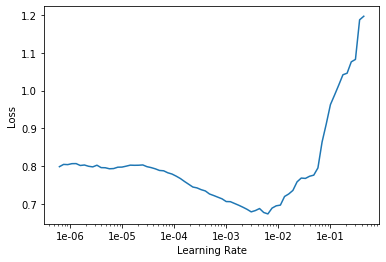

In [16]:
learn.lr_find()
learn.recorder.plot()

In [85]:
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.740984,nan,0.503500,00:00
1,0.725629,nan,0.552000,00:00
2,0.697618,nan,0.590500,00:00
3,0.662500,nan,0.634000,00:00
4,0.630369,nan,0.651500,00:00
5,0.602145,nan,0.660000,00:00
6,0.572755,nan,0.671500,00:00
7,0.556508,nan,0.677500,00:00
8,0.539997,nan,0.680000,00:00
9,0.534866,nan,0.674500,00:00


In [18]:
learn.unfreeze()
learn.fit_one_cycle(30, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.539868,nan,0.690500,00:00
1,0.537565,nan,0.686500,00:00
2,0.536394,nan,0.681500,00:00
3,0.535180,nan,0.686500,00:00
4,0.520982,nan,0.696500,00:00
5,0.510264,nan,0.698000,00:00
6,0.501663,nan,0.709500,00:00
7,0.487744,nan,0.704500,00:00
8,0.470711,nan,0.715000,00:00
9,0.454016,nan,0.720500,00:00


In [20]:
learn.unfreeze()
learn.fit_one_cycle(30, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.295005,nan,0.747000,00:00
1,0.295975,nan,0.751000,00:00
2,0.297937,nan,0.752000,00:00
3,0.295361,nan,0.753000,00:00
4,0.293090,nan,0.749500,00:00
5,0.290932,nan,0.750000,00:00
6,0.286525,nan,0.752000,00:00
7,0.277344,nan,0.751500,00:00
8,0.267841,nan,0.750000,00:00
9,0.262259,nan,0.747000,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


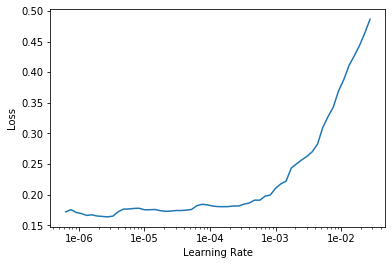

In [21]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.save('stage-1')

In [23]:
learn = None
gc.collect()

8517

# Test 1 -> Better

In [68]:
learn = tabular_learner(data,layers=[200, 300, 1000],emb_drop=.2, metrics=accuracy).to_fp16()

In [86]:
learn.load('stage-1')

Learner(data=TabularDataBunch;

Train: LabelList (1751 items)
x: TabularList
D279 -0.1439; D76 0.2148; D544 -0.1641; D615 -0.1108; D119 -0.3518; D643 -0.1222; D1505 -0.1509; D256 -0.0749; D395 -0.1229; D1510 -0.1128; D1301 -0.2230; D1582 -0.1386; D816 -0.1598; D1521 -0.1297; D74 0.0960; D894 -0.1806; D460 -0.4522; D1326 -0.1642; D311 -0.2548; D602 -0.0933; D710 -0.2037; D1383 -0.2460; D132 -0.2852; D955 -0.6382; D588 -0.1619; D293 -0.0749; D1026 1.4503; D1636 -0.1428; D1452 -0.1678; D1343 -0.2993; D123 -0.2086; D486 -0.0510; D875 -0.0657; D420 -0.2440; D790 -0.0691; D1083 -0.7532; D1571 -0.1128; D855 -0.0843; D1416 -0.2272; D1721 -0.1251; D1555 -0.1179; D1478 -0.1448; D162 0.6472; D1247 -0.3192; D213 -0.1741; D764 -0.3222; D725 -0.0867; D853 -0.0586; D1387 -0.2724; D1025 -0.3955; D1022 0.7532; D1175 -0.6515; D587 -0.1768; D1529 -0.1227; D850 -0.0981; D409 -0.1043; D819 -0.1132; D864 -0.1003; D387 -0.1692; D827 -0.0398; D1560 -0.0990; D1204 -0.2959; D1189 -0.5827; D596 -0.3962; D683 -0.

In [87]:
learn.validate()

[nan, tensor(0.7625)]

In [89]:
learn.show_results(ds_type=DatasetType.Valid)

# Test 2

In [59]:
learn = None
gc.collect()

7567

In [60]:
learn = tabular_learner(data,layers=[50, 100, 200, 300],emb_drop=.2, metrics=accuracy).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


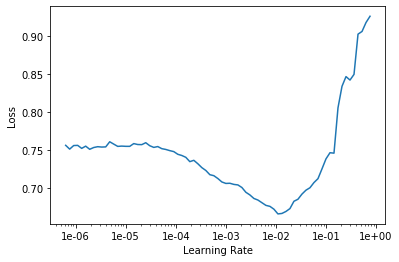

In [53]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [61]:
learn.unfreeze()
learn.fit_one_cycle(30, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.784983,nan,0.486500,00:00
1,0.780873,nan,0.486500,00:00
2,0.773014,nan,0.496500,00:00
3,0.758533,nan,0.512000,00:00
4,0.746017,nan,0.530000,00:00
5,0.719721,nan,0.566500,00:00
6,0.693784,nan,0.590500,00:00
7,0.669526,nan,0.607500,00:00
8,0.642358,nan,0.634000,00:00
9,0.618432,nan,0.641000,00:00


In [62]:
learn.unfreeze()
learn.fit_one_cycle(30, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.404818,nan,0.697500,00:00
1,0.406906,nan,0.696000,00:00
2,0.405635,nan,0.691500,00:00
3,0.405903,nan,0.701000,00:00
4,0.403869,nan,0.700000,00:00
5,0.400035,nan,0.704500,00:00
6,0.389656,nan,0.705000,00:00
7,0.381441,nan,0.709000,00:00
8,0.371541,nan,0.712500,00:00
9,0.363196,nan,0.721500,00:00


In [63]:
learn.validate()

[nan, tensor(0.7320)]

In [64]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.246225,nan,0.727500,00:00
1,0.245602,nan,0.734500,00:00
2,0.244819,nan,0.739500,00:00
3,0.246368,nan,0.730500,00:00
4,0.239665,nan,0.732500,00:00
5,0.233928,nan,0.727000,00:00
6,0.227355,nan,0.731000,00:00
7,0.225044,nan,0.728000,00:00
8,0.220021,nan,0.728500,00:00
9,0.212897,nan,0.735000,00:00


In [66]:
learn.unfreeze()
learn.fit_one_cycle(30, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.221530,nan,0.732500,00:00
1,0.213301,nan,0.733500,00:00
2,0.210323,nan,0.730000,00:00
3,0.209309,nan,0.734000,00:00
4,0.207933,nan,0.732000,00:00
5,0.204252,nan,0.733500,00:00
6,0.203714,nan,0.732500,00:00
7,0.199738,nan,0.733500,00:00
8,0.195180,nan,0.733000,00:00
9,0.191392,nan,0.731500,00:00


In [67]:
learn.validate()

[nan, tensor(0.7320)]